# ...

...<br>

Author(s): *Martin Fränzl*

## Required Packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

#import fnmatch
#import sys, os
import importlib

import pqreader.pqreader as pq
importlib.reload(pq)

from nptdms import TdmsFile # this library is needed to load TDMS files
import glob

from skimage.measure import profile_line 

In [2]:
hist1, bins1, _ = pq.thd_reader('Data/IRF.thd')
hist2, bins2, _ = pq.thd_reader('Data/Nile_Blue_Glycerol.thd')

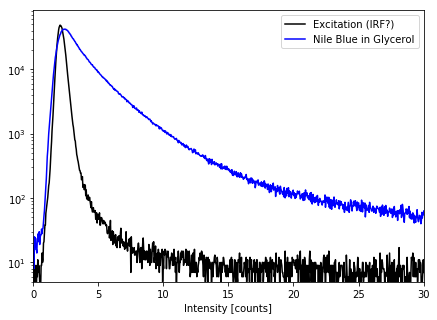

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.semilogy(bins1*1e9, hist1, 'k', label='Excitation (IRF?)')
ax.semilogy(bins2*1e9, hist2, 'b', label='Nile Blue in Glycerol')
ax.set_xlim(0, 30)
ax.set_ylim(5)
ax.set_xlabel('Time [ns]')
ax.set_xlabel('Intensity [counts]')
ax.legend();

In [4]:
plt.rcParams.update({'font.size' : 14,
                     'axes.labelpad' : 10,
                     'xtick.major.pad': 8,
                     'xtick.major.size': 6,
                     'xtick.major.width': 1,
                     'ytick.major.size': 6,
                     'ytick.major.width': 1,
                     'xtick.minor.size': 3,
                     'xtick.minor.width': 1,
                     'ytick.minor.size': 3,
                     'ytick.minor.width': 1,
                     'axes.linewidth': 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'lines.linewidth' : 1.5,})

## Load T3R Files from PicoQuant

In [5]:
t3records, timetags, detectors, nanotimes, metadata = pq.t3r_reader('Data/Nile_Blue_Glycerol.t3r')

In [6]:
t3records[0]

1606549743

In [7]:
valid_bits = 1
route_bits = 2
data_bits = 12
timetag_bits = 16

In [8]:
np.binary_repr(t3records[0], 32)

'01011111110000100000000011101111'

In [9]:
np.bitwise_and(np.right_shift(t3records[0], timetag_bits + data_bits + route_bits), 2**valid_bits - 1)

1

In [10]:
np.binary_repr(np.bitwise_and(np.right_shift(t3records[0], 16), 2**12-1), 12)

'111111000010'

In [11]:
np.binary_repr(np.bitwise_and(t3records[0], 2**16-1), 16)

'0000000011101111'

In [12]:
valid = np.bitwise_and(np.right_shift(t3records, timetag_bits + data_bits + route_bits), 2**valid_bits - 1).astype('uint8')
route = np.bitwise_and(np.right_shift(t3records, timetag_bits + data_bits), 2**route_bits - 1).astype('uint8')
data  = np.bitwise_and(np.right_shift(t3records, timetag_bits), 2**data_bits - 1).astype('uint16')
timetags = np.bitwise_and(t3records, 2**timetag_bits - 1).astype('uint64')

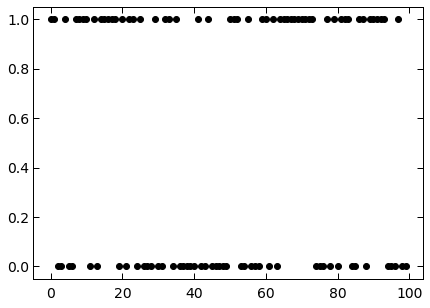

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(route[:100], 'ko')

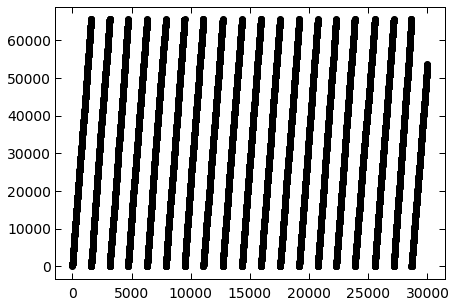

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(timetags[:30000], 'ko')

In [15]:
def correct_overflow(timetags, valid, overflow):
    overflow_idx = np.where(valid==0)[0]
    for i, (idx1, idx2) in enumerate(zip(overflow_idx[:-1], overflow_idx[1:])):
        timetags[idx1:idx2] += (i + 1)*overflow
    timetags[idx2:] += (i + 2)*overflow
    return np.delete(timetags, np.where(valid==0)[0])

In [16]:
overflow = 2**timetag_bits
timetags = correct_overflow(timetags, valid, overflow)

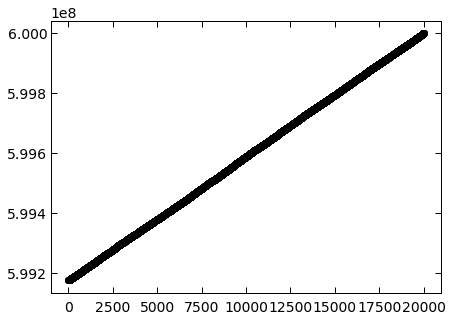

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(timetags[14510870:], 'ko')

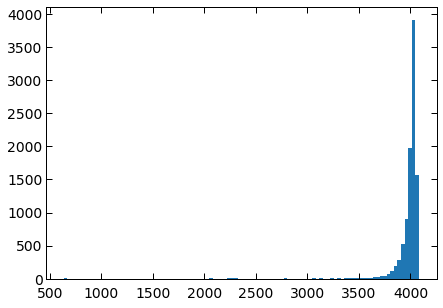

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.hist(data[:10000], bins=100);

In [21]:
timetags.size

14530870

In [107]:
timetags.size

14540025

In [108]:
detectors.size

14540025

In [109]:
nanotimes.size

14540025

In [99]:
timetag_unit = metadata['timetag_unit']
nanotime_unit = metadata['nanotime_unit']

In [106]:
timetags[:10]*timetag_unit*1e9

array([23900., 26000., 26700., 30800., 39300., 45900., 46700., 50100.,
       51900., 54600.])

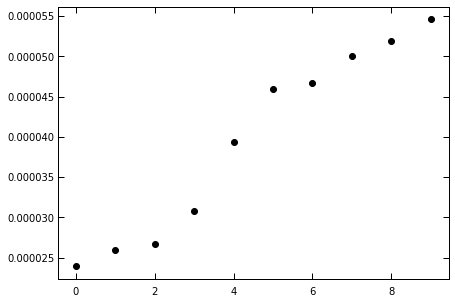

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(timetags[:10]*timetag_unit, 'ko')

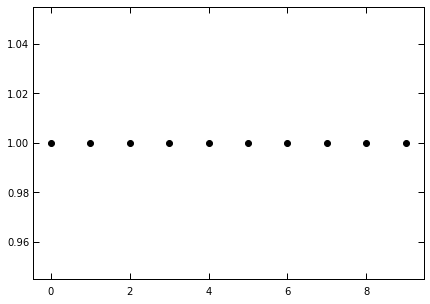

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(detectors[:10], 'ko')

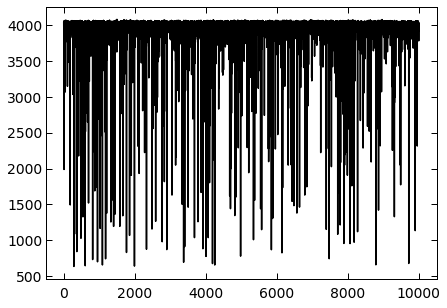

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.plot(nanotimes[:10000], 'k')